<a href="https://colab.research.google.com/github/Cbosugobux/projectFour/blob/Rosy/Team4ProjectRadarcharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q hvplot panel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
#import dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
import panel as pn
import holoviews as hv
from sklearn.preprocessing import MinMaxScaler


pn.extension()
hv.extension("bokeh")

In [ ]:
# Load the dataset
TeamBasicStatsDF = pd.read_csv("03172025TeamBasicStats.csv")


In [ ]:
sweet16 = ["Duke", "Florida", "Houston", "Auburn", "Tennessee", "Michigan State", "Texas Tech", "Maryland", "Arizona", "Brigham Young", "Arkansas", "Kentucky", "UCLA", "Connecticut", "Creighton", "Drake" ]
print(sweet16)

['Duke', 'Florida', 'Houston', 'Auburn', 'Tennessee', 'Michigan State', 'Texas Tech', 'Maryland', 'Arizona', 'Brigham Young', 'Arkansas', 'Kentucky', 'UCLA', 'Connecticut', 'Creighton', 'Drake']


In [ ]:
"Add a column to the DF containing a 1 for teams that made the sweet 16 and 0 for teams that did not"

TeamBasicStatsDF["Made_Sweet16"] = np.where(TeamBasicStatsDF["School"].isin(sweet16), 1, 0)
TeamBasicStatsDF.set_index('School', inplace=True)

print(TeamBasicStatsDF.columns)
TeamBasicStatsDF.head()

Index(['Rk', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'Unnamed: 8', 'W.1', 'L.1',
       'Unnamed: 11', 'W.2', 'L.2', 'Unnamed: 14', 'W.3', 'L.3', 'Unnamed: 17',
       'Tm.', 'Opp.', 'Unnamed: 20', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'Made_Sweet16'],
      dtype='object')


,Rk,G,W,L,W-L%,SRS,SOS,Unnamed: 8,W.1,L.1,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Made_Sweet16
School,,,,,,,,,,,,,,,,,,,,,
Abilene Christian,1,32,16,16,0.500,-5.47,-2.02,NaN,8,8,...,666,0.715,355,1081,421,331,94,476,670,0
Air Force,2,32,4,28,0.125,-7.75,3.96,NaN,1,19,...,572,0.635,236,956,428,181,91,433,571,0
Akron,3,34,28,6,0.824,3.54,-4.52,NaN,17,1,...,570,0.753,410,1325,615,262,127,407,609,0
Alabama,4,33,25,8,0.758,25.96,16.26,NaN,13,5,...,853,0.716,426,1422,555,200,147,422,628,0
Alabama A&M,5,32,10,22,0.313,-20.36,-9.77,NaN,6,12,...,738,0.664,447,1172,432,266,131,513,687,0


In [ ]:
# Select metrics for radar chart
metrics = ["W-L%", "SRS", "SOS", "AST", "TOV", "FG%", "FT%"]

In [ ]:
# Normalize data for sweet16 teams
radar_data = TeamBasicStatsDF.loc[sweet16, metrics]
scaler = MinMaxScaler()
radar_normalized = pd.DataFrame(scaler.fit_transform(radar_data),
                                index=radar_data.index,
                                columns=metrics)

In [ ]:
# Convert to long format for hvplot
radar_long = radar_normalized.reset_index().melt(id_vars='School', var_name='Metric', value_name='Value')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
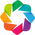

In [ ]:
# Create interactive radar chart function using hvplot
import holoviews as hv
hv.extension("bokeh")

def radar_plot(team):
    df = radar_long[radar_long['School'] == team].copy()
    df = pd.concat([df, df.iloc[0:1]])  # loop back to start
    return df.hvplot.line(x='Metric', y='Value', title=f"Radar Chart: {team}",
                          line_width=2, color='firebrick', ylim=(0, 1)) * \
           df.hvplot.scatter(x='Metric', y='Value', size=100, color='firebrick')

In [ ]:
# Create interactive dropdown widget
team_selector = pn.widgets.Select(name='Select Team', options=sweet16)
interactive_chart = pn.bind(radar_plot, team=team_selector)

In [ ]:
# Display
pn.Column("## Interactive Radar Chart - Sweet 16 Teams", team_selector, interactive_chart).servable()

Column
    [0] Markdown(str)
    [1] Select(options=['Duke', 'Florida', ...], value='Duke')
    [2] ParamFunction(function, _pane=HoloViews, defer_load=False)